# Rabbani Nur Kumoro - 21/472599/PA/20310
# Deep Learning - CSB - In Class Assignment
# Genose Classification

# 1. Import Required Libraries
Additionally, a seed will be set in order to achive reproducible results.

In [ ]:
import os
import cv2 as cv
import shutil
import random
import PIL
import posixpath
import pathlib
import glob
import numpy as np
import pandas as pd
import keras
import re
import seaborn as sns
import tensorflow as tf
from PIL import Image, ImageFont
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from pandas import DataFrame
from itertools import chain
from imutils import paths
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, MaxPooling2D, Conv2D, Flatten, Dropout, Activation, GlobalMaxPool2D, BatchNormalization, AveragePooling2D
from keras.optimizers import Adam, RMSprop, Adamax, SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score, confusion_matrix, classification_report, precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from numpy.random import seed
seed(10)
tf.random.set_seed(10)

print('Imported Successfully')

Imported Successfully


# 2. Data Preparation & Pre-Processing

In [ ]:
# Function to check if a file is an image
def is_image(filename):
    return filename.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))

# Load the training dataset
dataset_dir = "./In-Class Assignment Dataset Manipulated/training_set"
imgs = []
labels = []

for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)

    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            filenames = os.path.join(folder_path, filename)

            if is_image(filename):
                img = cv.imread(filenames)
                img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
                img = cv.resize(img, (28, 28))
                imgs.append(img)
                labels.append(folder)

# Load the validation dataset
dataset_dir = "./In-Class Assignment Dataset Manipulated/validation_set"
test_imgs = []
test_labels = []

for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)

    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            filenames = os.path.join(folder_path, filename)

            if is_image(filename):
                img = cv.imread(filenames)
                img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
                img = cv.resize(img, (28, 28))
                test_imgs.append(img)
                test_labels.append(folder)

# 3. Feature Training

In [ ]:
features = []
for img in imgs:
    features.append(img.reshape(np.size(img,0)*np.size(img,1),1)/255)

test_features = []
for img in test_imgs:
    test_features.append(img.reshape(np.size(img,0)*np.size(img,1),1)/255)

In [ ]:
x_train =np.array(features).astype(np.float32);
x_test  =np.array(test_features).astype(np.float32);
y_train = np.array(labels).reshape(np.size(labels),1).astype(int);
y_test = np.array(test_labels).reshape(np.size(test_labels),1).astype(int)

# 4. Model 1 - 50% Accuracy

In [ ]:
# Create a Sequential model
model = Sequential()

# Add a Flatten layer to convert input data into a flat vector
model.add(Flatten())

# Add a Dense hidden layer with 48 neurons and ReLU activation function
model.add(Dense(48, activation='relu'))

# Add the output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with stochastic gradient descent (SGD) optimizer,
# binary cross-entropy loss function, and accuracy metric
model.compile(optimizer='sgd', loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

# Train the MLP model on the training data for 100 epochs
# using the validation data for validation during training
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
1/4 [======>.......................] - ETA: 0s - loss: 0.7592 - accuracy: 0.5312

2023-09-19 21:49:19.253749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 99ms/step - loss: 0.7178 - accuracy: 0.5044 - val_loss: 0.7227 - val_accuracy: 0.5000
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 0.7186 - accuracy: 0.4688

2023-09-19 21:49:19.637157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 32ms/step - loss: 0.7176 - accuracy: 0.4779 - val_loss: 0.7243 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 21ms/step - loss: 0.7264 - accuracy: 0.5310 - val_loss: 0.8126 - val_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.7501 - accuracy: 0.4513 - val_loss: 0.7115 - val_accuracy: 0.4333
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7552 - accuracy: 0.3894 - val_loss: 0.7137 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.7014 - accuracy: 0.5310 - val_loss: 0.7124 - val_accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.7330 - accuracy: 0.4779 - val_loss: 0.7089 - val_accuracy: 0.5000
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 0.7051 - accuracy: 0.4867 - val_loss: 0.7270 - val_accuracy: 0.5000
Epoch 9/100
4/4 [===============

4/4 [==============================] - 0s 12ms/step - loss: 0.6929 - accuracy: 0.5487 - val_loss: 0.7241 - val_accuracy: 0.5000
Epoch 61/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7006 - accuracy: 0.5487 - val_loss: 0.7053 - val_accuracy: 0.5000
Epoch 62/100
4/4 [==============================] - 0s 11ms/step - loss: 0.7031 - accuracy: 0.4690 - val_loss: 0.6898 - val_accuracy: 0.5333
Epoch 63/100
4/4 [==============================] - 0s 11ms/step - loss: 0.7026 - accuracy: 0.5310 - val_loss: 0.6986 - val_accuracy: 0.5000
Epoch 64/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6889 - accuracy: 0.5487 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 65/100
4/4 [==============================] - 0s 11ms/step - loss: 0.7043 - accuracy: 0.4867 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 66/100
4/4 [==============================] - 0s 11ms/step - loss: 0.7034 - accuracy: 0.4513 - val_loss: 0.6879 - val_accuracy: 0.5000
Epoch 67/100
4/4 [========

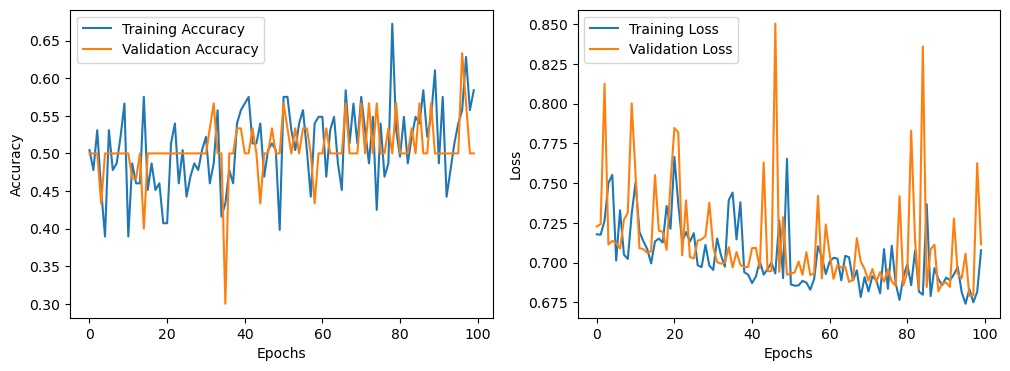

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(loss, acc)

0.7115630507469177 0.5


In [ ]:
# Evaluate the model on the test data and store the loss and accuracy
loss, acc = model.evaluate(x_test, y_test, verbose=0)

# Print the loss of this program
print("The Loss of This Model 1: ", loss)

# Print the accuracy of the program
accuracy_percentage = acc * 100
print("The Validation Accuracy of This Model 1: ", accuracy_percentage, "%")

The Loss of This Model 1:  0.7115630507469177
The Validation Accuracy of This Model 1:  50.0 %


# 5. Model 2 - 56% Accuracy

In [ ]:
# Create a Sequential model
model2 = Sequential()

# Add a Flatten layer to transform input data into a 1D array
model2.add(Flatten())

# Add a Dense hidden layer with 48 neurons and ReLU activation function
model2.add(Dense(48, activation='relu'))

# Add an output layer with 1 neuron and sigmoid activation function for binary classification
model2.add(Dense(1, activation='sigmoid'))

# Compile the model with stochastic gradient descent (SGD) optimizer, binary cross-entropy loss, and accuracy metric
model2.compile(optimizer='sgd', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Train the model using the training data with early stopping
history2 = model2.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test))

Epoch 1/500


2023-09-19 22:11:25.832303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 107ms/step - loss: 0.7065 - accuracy: 0.5221 - val_loss: 0.6898 - val_accuracy: 0.4333
Epoch 2/500
1/4 [======>.......................] - ETA: 0s - loss: 0.7046 - accuracy: 0.4062

2023-09-19 22:11:26.272686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 24ms/step - loss: 0.6957 - accuracy: 0.4779 - val_loss: 0.6981 - val_accuracy: 0.5000
Epoch 3/500
4/4 [==============================] - 0s 17ms/step - loss: 0.7128 - accuracy: 0.5398 - val_loss: 0.7205 - val_accuracy: 0.5000
Epoch 4/500
4/4 [==============================] - 0s 17ms/step - loss: 0.7051 - accuracy: 0.5487 - val_loss: 0.6875 - val_accuracy: 0.5000
Epoch 5/500
4/4 [==============================] - 0s 22ms/step - loss: 0.7232 - accuracy: 0.4248 - val_loss: 0.6857 - val_accuracy: 0.6333
Epoch 6/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6914 - accuracy: 0.5575 - val_loss: 0.6860 - val_accuracy: 0.5667
Epoch 7/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7058 - accuracy: 0.4690 - val_loss: 0.6845 - val_accuracy: 0.6000
Epoch 8/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6907 - accuracy: 0.5221 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 9/500
4/4 [===============

4/4 [==============================] - 0s 11ms/step - loss: 0.6868 - accuracy: 0.5398 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 61/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6900 - accuracy: 0.5487 - val_loss: 0.6845 - val_accuracy: 0.5000
Epoch 62/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6899 - accuracy: 0.5310 - val_loss: 0.6741 - val_accuracy: 0.7000
Epoch 63/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6886 - accuracy: 0.5575 - val_loss: 0.6775 - val_accuracy: 0.5000
Epoch 64/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6849 - accuracy: 0.5398 - val_loss: 0.6754 - val_accuracy: 0.5333
Epoch 65/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6899 - accuracy: 0.5044 - val_loss: 0.6772 - val_accuracy: 0.5000
Epoch 66/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6917 - accuracy: 0.4425 - val_loss: 0.6746 - val_accuracy: 0.7000
Epoch 67/500
4/4 [========

4/4 [==============================] - 0s 12ms/step - loss: 0.6781 - accuracy: 0.6106 - val_loss: 0.6645 - val_accuracy: 0.8000
Epoch 119/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6716 - accuracy: 0.6195 - val_loss: 0.6638 - val_accuracy: 0.8000
Epoch 120/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6796 - accuracy: 0.5487 - val_loss: 0.6715 - val_accuracy: 0.5000
Epoch 121/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6739 - accuracy: 0.5575 - val_loss: 0.6637 - val_accuracy: 0.8333
Epoch 122/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6697 - accuracy: 0.6637 - val_loss: 0.6768 - val_accuracy: 0.5000
Epoch 123/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6771 - accuracy: 0.6283 - val_loss: 0.6629 - val_accuracy: 0.8333
Epoch 124/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6770 - accuracy: 0.5929 - val_loss: 0.6860 - val_accuracy: 0.5000
Epoch 125/500
4/4 [=

Epoch 176/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6727 - accuracy: 0.5752 - val_loss: 0.6551 - val_accuracy: 0.6333
Epoch 177/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6741 - accuracy: 0.6106 - val_loss: 0.6604 - val_accuracy: 0.5000
Epoch 178/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6702 - accuracy: 0.5752 - val_loss: 0.6591 - val_accuracy: 0.5000
Epoch 179/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6683 - accuracy: 0.5221 - val_loss: 0.6510 - val_accuracy: 0.8333
Epoch 180/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6577 - accuracy: 0.6903 - val_loss: 0.6529 - val_accuracy: 0.7000
Epoch 181/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6814 - accuracy: 0.5044 - val_loss: 0.6847 - val_accuracy: 0.5000
Epoch 182/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6693 - accuracy: 0.5841 - val_loss: 0.6498 - val_accuracy: 0.7667
Epoch 

Epoch 234/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7034 - accuracy: 0.5310 - val_loss: 0.7152 - val_accuracy: 0.5000
Epoch 235/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6542 - accuracy: 0.6372 - val_loss: 0.6455 - val_accuracy: 0.5000
Epoch 236/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6688 - accuracy: 0.5664 - val_loss: 0.6336 - val_accuracy: 0.9000
Epoch 237/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6514 - accuracy: 0.6814 - val_loss: 0.6565 - val_accuracy: 0.5000
Epoch 238/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6554 - accuracy: 0.6814 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 239/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6630 - accuracy: 0.6018 - val_loss: 0.6387 - val_accuracy: 0.6000
Epoch 240/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6423 - accuracy: 0.6991 - val_loss: 0.6333 - val_accuracy: 0.8000
Epoch 

Epoch 292/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6273 - accuracy: 0.7080 - val_loss: 0.6153 - val_accuracy: 0.8333
Epoch 293/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6429 - accuracy: 0.6637 - val_loss: 0.6132 - val_accuracy: 0.9000
Epoch 294/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6329 - accuracy: 0.6814 - val_loss: 0.6262 - val_accuracy: 0.5000
Epoch 295/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6282 - accuracy: 0.6195 - val_loss: 0.6160 - val_accuracy: 0.7000
Epoch 296/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6228 - accuracy: 0.7080 - val_loss: 0.6112 - val_accuracy: 0.9000
Epoch 297/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6252 - accuracy: 0.7345 - val_loss: 0.6109 - val_accuracy: 0.9333
Epoch 298/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6231 - accuracy: 0.7345 - val_loss: 0.6144 - val_accuracy: 0.7667
Epoch 

Epoch 350/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5966 - accuracy: 0.7965 - val_loss: 0.7791 - val_accuracy: 0.5000
Epoch 351/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7952 - accuracy: 0.4425 - val_loss: 0.5921 - val_accuracy: 0.8667
Epoch 352/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6405 - accuracy: 0.6372 - val_loss: 0.6683 - val_accuracy: 0.5000
Epoch 353/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6551 - accuracy: 0.5929 - val_loss: 0.6482 - val_accuracy: 0.5000
Epoch 354/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6815 - accuracy: 0.6018 - val_loss: 0.7078 - val_accuracy: 0.5000
Epoch 355/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6582 - accuracy: 0.6372 - val_loss: 0.5864 - val_accuracy: 0.8333
Epoch 356/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6480 - accuracy: 0.6637 - val_loss: 0.7110 - val_accuracy: 0.5000
Epoch 

Epoch 408/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5967 - accuracy: 0.6814 - val_loss: 0.7415 - val_accuracy: 0.5000
Epoch 409/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6220 - accuracy: 0.6637 - val_loss: 0.5617 - val_accuracy: 0.9333
Epoch 410/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5713 - accuracy: 0.8230 - val_loss: 0.6204 - val_accuracy: 0.5667
Epoch 411/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6083 - accuracy: 0.6283 - val_loss: 0.5939 - val_accuracy: 0.6000
Epoch 412/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6461 - accuracy: 0.5841 - val_loss: 0.5812 - val_accuracy: 0.6333
Epoch 413/500
4/4 [==============================] - 0s 21ms/step - loss: 0.5985 - accuracy: 0.6726 - val_loss: 0.5608 - val_accuracy: 0.9000
Epoch 414/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5866 - accuracy: 0.6991 - val_loss: 0.5857 - val_accuracy: 0.6000
Epoch 

Epoch 466/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6105 - accuracy: 0.6903 - val_loss: 0.6549 - val_accuracy: 0.5000
Epoch 467/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6715 - accuracy: 0.5752 - val_loss: 0.6284 - val_accuracy: 0.5667
Epoch 468/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6940 - accuracy: 0.5221 - val_loss: 0.7392 - val_accuracy: 0.5000
Epoch 469/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6603 - accuracy: 0.5664 - val_loss: 0.6114 - val_accuracy: 0.5333
Epoch 470/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6287 - accuracy: 0.5664 - val_loss: 0.5813 - val_accuracy: 0.6000
Epoch 471/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7367 - accuracy: 0.5044 - val_loss: 0.6847 - val_accuracy: 0.5000
Epoch 472/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6409 - accuracy: 0.6018 - val_loss: 0.5791 - val_accuracy: 0.6333
Epoch 

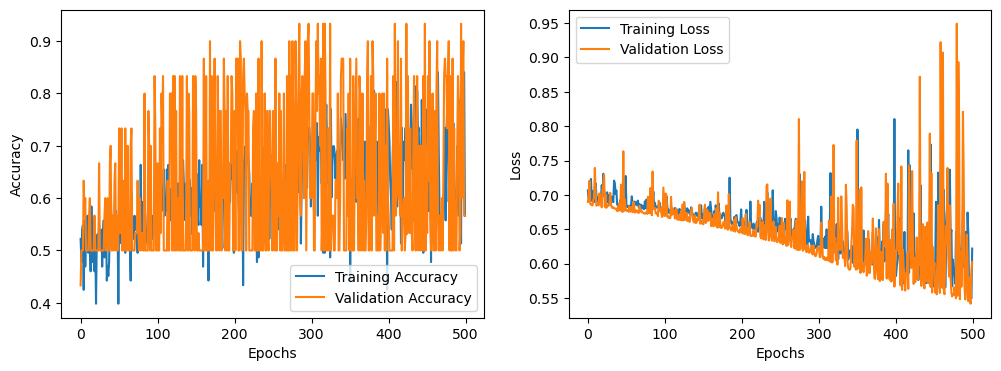

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
loss, acc = model2.evaluate(x_test, y_test, verbose=0)
print(loss, acc)

0.6025087237358093 0.5666666626930237


In [ ]:
# Print the loss of this program
print("The Loss of This Model 2: ", loss)

# Print the accuracy of the program
accuracy_percentage = acc * 100
print("The Validation Accuracy of This Model 2: ", accuracy_percentage, "%")

The Loss of This Model 2:  0.6025087237358093
The Validation Accuracy of This Model 2:  56.66666626930237 %


# 6. Model 3 - Best Model with 73% Accuracy

In [ ]:
# Create a Sequential model
model3 = Sequential()
model3.add(Flatten())

# Add a hidden layer with 64 neurons and ReLU activation
model3.add(Dense(64, activation='relu'))

# Add another hidden layer with 32 neurons and ReLU activation
model3.add(Dense(32, activation='relu'))

# Add the output layer with 1 neuron and sigmoid activation
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='sgd', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Train the modified MLP model
history3 = model3.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test))

Epoch 1/500


2023-09-19 22:15:22.540969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 156ms/step - loss: 0.7454 - accuracy: 0.5221 - val_loss: 0.7024 - val_accuracy: 0.3667
Epoch 2/500
1/4 [======>.......................] - ETA: 0s - loss: 0.7037 - accuracy: 0.3438

2023-09-19 22:15:23.139597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 24ms/step - loss: 0.6956 - accuracy: 0.4425 - val_loss: 0.7121 - val_accuracy: 0.5000
Epoch 3/500
4/4 [==============================] - 0s 15ms/step - loss: 0.7108 - accuracy: 0.5044 - val_loss: 0.7174 - val_accuracy: 0.5000
Epoch 4/500
4/4 [==============================] - 0s 18ms/step - loss: 0.7013 - accuracy: 0.5310 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 5/500
4/4 [==============================] - 0s 19ms/step - loss: 0.7172 - accuracy: 0.4159 - val_loss: 0.6910 - val_accuracy: 0.6000
Epoch 6/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6907 - accuracy: 0.4956 - val_loss: 0.6904 - val_accuracy: 0.5333
Epoch 7/500
4/4 [==============================] - 0s 15ms/step - loss: 0.7061 - accuracy: 0.4425 - val_loss: 0.6919 - val_accuracy: 0.5333
Epoch 8/500
4/4 [==============================] - 0s 21ms/step - loss: 0.6910 - accuracy: 0.5398 - val_loss: 0.7016 - val_accuracy: 0.5000
Epoch 9/500
4/4 [===============

4/4 [==============================] - 0s 12ms/step - loss: 0.6845 - accuracy: 0.5487 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 61/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6863 - accuracy: 0.5310 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 62/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6897 - accuracy: 0.5133 - val_loss: 0.6808 - val_accuracy: 0.5333
Epoch 63/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6847 - accuracy: 0.5752 - val_loss: 0.6830 - val_accuracy: 0.4667
Epoch 64/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6821 - accuracy: 0.5752 - val_loss: 0.6797 - val_accuracy: 0.6000
Epoch 65/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6864 - accuracy: 0.5133 - val_loss: 0.6840 - val_accuracy: 0.5333
Epoch 66/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6875 - accuracy: 0.5221 - val_loss: 0.6802 - val_accuracy: 0.5333
Epoch 67/500
4/4 [========

4/4 [==============================] - 0s 12ms/step - loss: 0.6729 - accuracy: 0.6283 - val_loss: 0.6625 - val_accuracy: 0.7667
Epoch 119/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6640 - accuracy: 0.6637 - val_loss: 0.6639 - val_accuracy: 0.5667
Epoch 120/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6807 - accuracy: 0.5664 - val_loss: 0.6893 - val_accuracy: 0.5333
Epoch 121/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6707 - accuracy: 0.5664 - val_loss: 0.6619 - val_accuracy: 0.7667
Epoch 122/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6611 - accuracy: 0.7168 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 123/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6693 - accuracy: 0.6018 - val_loss: 0.6612 - val_accuracy: 0.7667
Epoch 124/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6713 - accuracy: 0.6018 - val_loss: 0.7305 - val_accuracy: 0.5000
Epoch 125/500
4/4 [=

Epoch 176/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6696 - accuracy: 0.6018 - val_loss: 0.6528 - val_accuracy: 0.5333
Epoch 177/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6814 - accuracy: 0.5133 - val_loss: 0.6569 - val_accuracy: 0.5333
Epoch 178/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6629 - accuracy: 0.5664 - val_loss: 0.6632 - val_accuracy: 0.5000
Epoch 179/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6612 - accuracy: 0.5310 - val_loss: 0.6494 - val_accuracy: 0.7667
Epoch 180/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6469 - accuracy: 0.7168 - val_loss: 0.6458 - val_accuracy: 0.8000
Epoch 181/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6864 - accuracy: 0.4956 - val_loss: 0.7261 - val_accuracy: 0.5000
Epoch 182/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6736 - accuracy: 0.5929 - val_loss: 0.6476 - val_accuracy: 0.8000
Epoch 

Epoch 234/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7248 - accuracy: 0.5752 - val_loss: 0.7255 - val_accuracy: 0.5000
Epoch 235/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6394 - accuracy: 0.6814 - val_loss: 0.6406 - val_accuracy: 0.5667
Epoch 236/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6713 - accuracy: 0.5398 - val_loss: 0.6314 - val_accuracy: 0.6333
Epoch 237/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6343 - accuracy: 0.6283 - val_loss: 0.6624 - val_accuracy: 0.5333
Epoch 238/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6459 - accuracy: 0.6814 - val_loss: 0.7325 - val_accuracy: 0.5000
Epoch 239/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6628 - accuracy: 0.5575 - val_loss: 0.6610 - val_accuracy: 0.5333
Epoch 240/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6321 - accuracy: 0.7080 - val_loss: 0.6271 - val_accuracy: 0.7667
Epoch 

Epoch 292/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6113 - accuracy: 0.6814 - val_loss: 0.6048 - val_accuracy: 0.8000
Epoch 293/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6328 - accuracy: 0.6814 - val_loss: 0.6268 - val_accuracy: 0.5667
Epoch 294/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6018 - accuracy: 0.6549 - val_loss: 0.6079 - val_accuracy: 0.8000
Epoch 295/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6184 - accuracy: 0.6460 - val_loss: 0.6147 - val_accuracy: 0.6333
Epoch 296/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6035 - accuracy: 0.7434 - val_loss: 0.6007 - val_accuracy: 0.8333
Epoch 297/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6077 - accuracy: 0.7522 - val_loss: 0.6082 - val_accuracy: 0.7667
Epoch 298/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6031 - accuracy: 0.7522 - val_loss: 0.6124 - val_accuracy: 0.6333
Epoch 

Epoch 350/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5722 - accuracy: 0.8407 - val_loss: 0.8403 - val_accuracy: 0.5000
Epoch 351/500
4/4 [==============================] - 0s 12ms/step - loss: 0.8615 - accuracy: 0.4248 - val_loss: 0.5854 - val_accuracy: 0.8333
Epoch 352/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6351 - accuracy: 0.6903 - val_loss: 0.6599 - val_accuracy: 0.5000
Epoch 353/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6571 - accuracy: 0.5575 - val_loss: 0.6303 - val_accuracy: 0.5000
Epoch 354/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6748 - accuracy: 0.5752 - val_loss: 0.7209 - val_accuracy: 0.5000
Epoch 355/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6526 - accuracy: 0.7080 - val_loss: 0.5837 - val_accuracy: 0.8667
Epoch 356/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6383 - accuracy: 0.6991 - val_loss: 0.7691 - val_accuracy: 0.5000
Epoch 

Epoch 408/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5864 - accuracy: 0.6726 - val_loss: 0.8990 - val_accuracy: 0.5000
Epoch 409/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6861 - accuracy: 0.6018 - val_loss: 0.5563 - val_accuracy: 0.7667
Epoch 410/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5520 - accuracy: 0.8230 - val_loss: 0.6137 - val_accuracy: 0.5667
Epoch 411/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6222 - accuracy: 0.6018 - val_loss: 0.7471 - val_accuracy: 0.5000
Epoch 412/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7304 - accuracy: 0.4779 - val_loss: 0.5947 - val_accuracy: 0.6000
Epoch 413/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6133 - accuracy: 0.6018 - val_loss: 0.5651 - val_accuracy: 0.8333
Epoch 414/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5616 - accuracy: 0.7522 - val_loss: 0.5601 - val_accuracy: 0.8333
Epoch 

Epoch 466/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5780 - accuracy: 0.6903 - val_loss: 0.7785 - val_accuracy: 0.5000
Epoch 467/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7709 - accuracy: 0.5310 - val_loss: 0.7483 - val_accuracy: 0.5000
Epoch 468/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6980 - accuracy: 0.5310 - val_loss: 0.6927 - val_accuracy: 0.5333
Epoch 469/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6253 - accuracy: 0.6106 - val_loss: 0.6147 - val_accuracy: 0.5000
Epoch 470/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6204 - accuracy: 0.5752 - val_loss: 0.5617 - val_accuracy: 0.7333
Epoch 471/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7421 - accuracy: 0.5487 - val_loss: 0.5992 - val_accuracy: 0.5667
Epoch 472/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6068 - accuracy: 0.6018 - val_loss: 0.5553 - val_accuracy: 0.8000
Epoch 

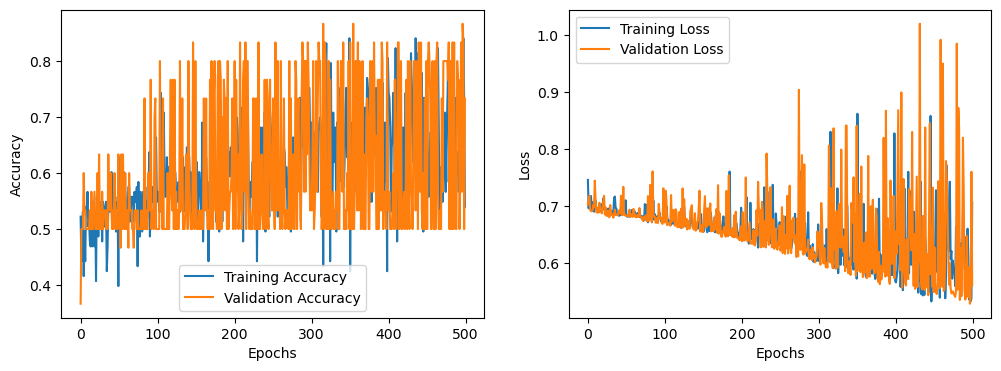

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
loss, acc = model3.evaluate(x_test, y_test, verbose=0)
print(loss, acc)

0.5606496334075928 0.7333333492279053


In [ ]:
# Print the loss of this program
print("The Loss of This Model 3: ", loss)

# Print the accuracy of the program
accuracy_percentage = acc * 100
print("The Validation Accuracy of This Model 3: ", accuracy_percentage, "%")

The Loss of This Model 3:  0.5606496334075928
The Validation Accuracy of This Model 3:  73.33333492279053 %


# 7. Model Comparison

In [ ]:
# Evaluate and print the results for model1
loss1, acc1 = model.evaluate(x_test, y_test, verbose=0)
print("Model 1:")
print("Accuracy: {:.2%}".format(acc1))
print("Loss: {:.4f}".format(loss1))
print()

# Evaluate and print the results for model2
loss2, acc2 = model2.evaluate(x_test, y_test, verbose=0)
print("Model 2:")
print("Accuracy: {:.2%}".format(acc2))
print("Loss: {:.4f}".format(loss2))
print()

# Evaluate and print the results for model3
loss3, acc3 = model3.evaluate(x_test, y_test, verbose=0)
print("Model 3:")
print("Accuracy: {:.2%}".format(acc3))
print("Loss: {:.4f}".format(loss3))
print()

Model 1:
Accuracy: 50.00%
Loss: 0.7116

Model 2:
Accuracy: 56.67%
Loss: 0.6025

Model 3:
Accuracy: 73.33%
Loss: 0.5606



# 8. Save the Best Model into .h5 File

In [ ]:
# Save the model to an HDF5 file
model3.save("model3.h5")

/Users/rabbanikumoro/tensorflow-test/env/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 9. Conclusion

### Based on the evaluation results of the three models, the following conclusions can be drawn:

### Model 1:

#### Accuracy: 50.00%
#### Loss: 0.7116
#### Model 1 has the lowest accuracy among the three models, indicating that it performs the worst in terms of correctly classifying the data. Additionally, it has the highest loss, which suggests that it has a higher level of error in its predictions.

### Model 2:

#### Accuracy: 56.67%
#### Loss: 0.6025
#### Model 2 shows a slightly improved accuracy compared to Model 1. However, the accuracy is still relatively low. The loss is lower than Model 1, indicating that it performs better in terms of minimizing prediction errors.

### **Model 3**:

#### **Accuracy: 73.33% ✅**
#### **Loss: 0.5606 ✅**
#### Model 3 demonstrates the highest accuracy among the three models, with an accuracy rate of 73.33%. This suggests that Model 3 is the most effective in correctly classifying the data. Additionally, it has the lowest loss, indicating that it has the smallest prediction errors.

#### In summary, Model 3 outperforms Model 2 and Model 1 in terms of both accuracy and loss. It provides the highest accuracy and the lowest prediction errors, making it the preferred choice among these three models for the given task. However, further optimization and evaluation may be needed to improve the performance even more.